## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.shape

(740, 21)

In [4]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

In [5]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [6]:
absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

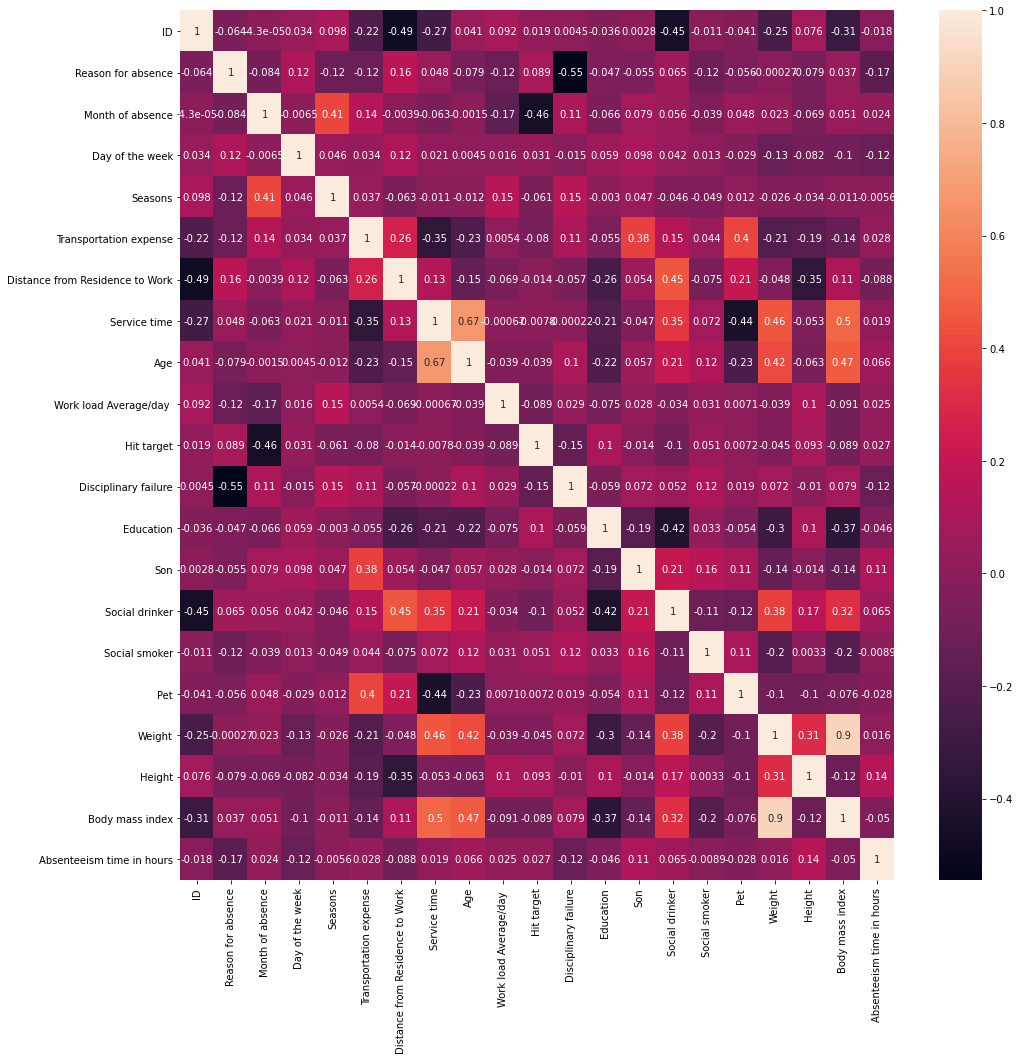

In [7]:
# answer below:
plt.figure(figsize=[16,16])
sns.heatmap(absent.corr(), annot=True)
plt.show()

In [8]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [9]:
absent.drop('Body mass index', axis=1, inplace=True)

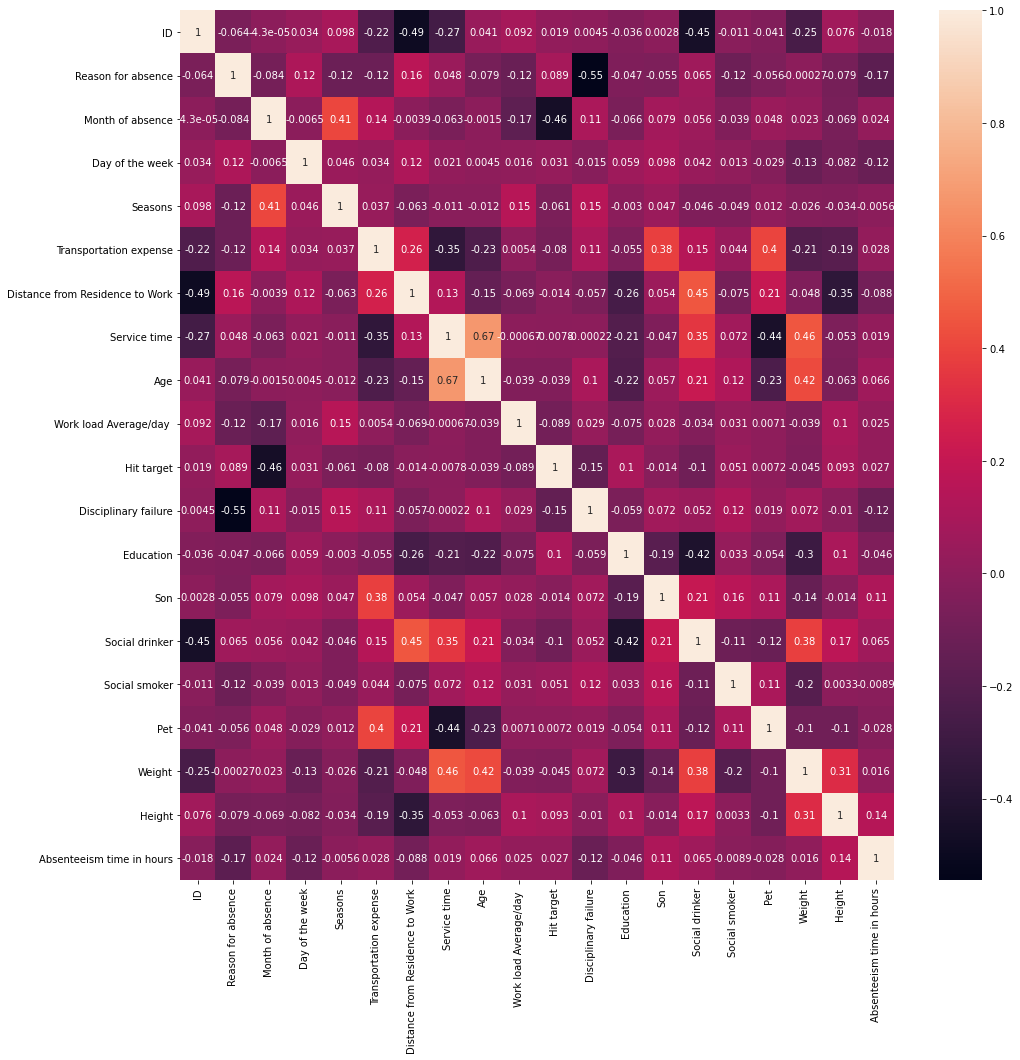

In [10]:
plt.figure(figsize=[16,16])
sns.heatmap(absent.corr(), annot=True)
plt.show()

In [11]:
absent['Month of absence'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0])

In [12]:
absent.drop('Month of absence', axis=1, inplace=True)

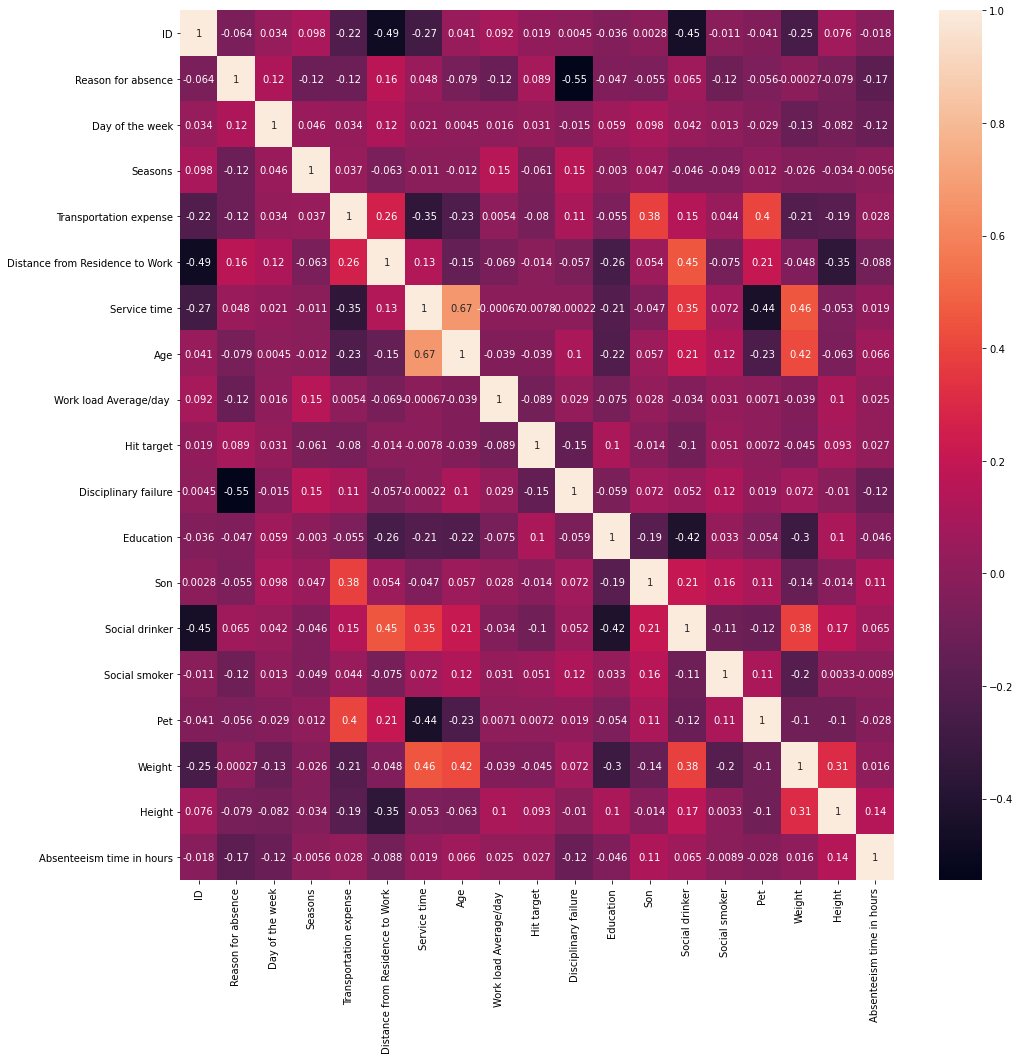

In [13]:
plt.figure(figsize=[16,16])
sns.heatmap(absent.corr(), annot=True)
plt.show()

Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [14]:
# answer below:
absent.dtypes


ID                                   int64
Reason for absence                   int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Absenteeism time in hours            int64
dtype: object

In [15]:
num_cols = ['Transportation expense', 'Distance from Residence to Work','Service time', 'Age',
           'Work load Average/day ','Hit target','Weight', 'Height', 'Absenteeism time in hours']

In [16]:
cat_cols = list(absent.columns)

for col in num_cols:
        cat_cols.remove(col)

cat_cols

['ID',
 'Reason for absence',
 'Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet']

In [17]:
X = pd.get_dummies(absent, columns=cat_cols, drop_first=True)
X = X.drop('Absenteeism time in hours', axis=1)
y = absent['Absenteeism time in hours']

Split the data into train and test with test containing 20% of the data, then scale your features.

In [18]:
# answer below:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scale = MinMaxScaler()

X_train_scale = scale.fit_transform(X_train, y_train)
X_test_scale = scale.transform(X_test)

Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

n_neighbors = range(3,50)
params = {'n_neighbors': n_neighbors}
knn = KNeighborsRegressor()

grid = GridSearchCV(knn, params, 
                    scoring='neg_root_mean_squared_error', cv=5, return_train_score=True)
grid.fit(X_train_scale, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(3, 50)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True,
             scoring='neg_root_mean_squared_error', verbose=0)

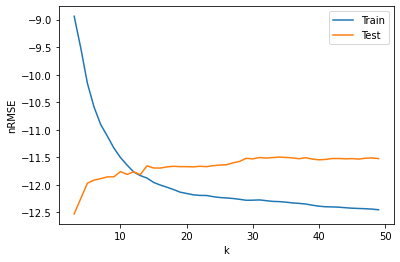

In [20]:
plt.plot(n_neighbors, grid.cv_results_['mean_train_score'])
plt.plot(n_neighbors, grid.cv_results_['mean_test_score'])
plt.legend(['Train', 'Test'])
plt.xlabel('k')
plt.ylabel('nRMSE')
plt.show()

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [21]:
# answer below
from sklearn.metrics import mean_squared_error

train_pred = grid.best_estimator_.predict(X_train_scale)
test_pred = grid.best_estimator_.predict(X_test_scale)

print(
    f'bes k: {grid.best_estimator_.n_neighbors}\n'
    f'Train: RMSE: {mean_squared_error(y_train, train_pred, squared=False)}\n'
    f'Test RMSE: {mean_squared_error(y_test, test_pred, squared=False)}\n'
)


bes k: 34
Train: RMSE: 12.381272870355799
Test RMSE: 14.089869209346189



Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

In [22]:
# answer below

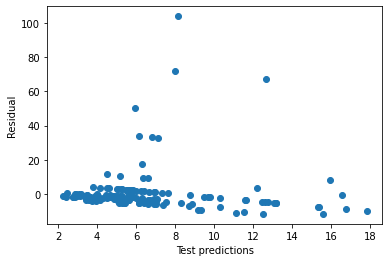

In [23]:
res = y_test - test_pred
plt.scatter(test_pred, res)
plt.xlabel('Test predictions')
plt.ylabel('Residual')
plt.show()

In [24]:
# The model could be imporved by removing more features